In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
data_path = "../../data/"

In [4]:
df = pd.read_csv(data_path + "feature_frame.csv")

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   variant_id                        2880549 non-null  int64  
 1   product_type                      2880549 non-null  object 
 2   order_id                          2880549 non-null  int64  
 3   user_id                           2880549 non-null  int64  
 4   created_at                        2880549 non-null  object 
 5   order_date                        2880549 non-null  object 
 6   user_order_seq                    2880549 non-null  int64  
 7   outcome                           2880549 non-null  float64
 8   ordered_before                    2880549 non-null  float64
 9   abandoned_before                  2880549 non-null  float64
 10  active_snoozed                    2880549 non-null  float64
 11  set_as_regular                    288

In [6]:
df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [7]:
df.dtypes

variant_id                            int64
product_type                         object
order_id                              int64
user_id                               int64
created_at                           object
order_date                           object
user_order_seq                        int64
outcome                             float64
ordered_before                      float64
abandoned_before                    float64
active_snoozed                      float64
set_as_regular                      float64
normalised_price                    float64
discount_pct                        float64
vendor                               object
global_popularity                   float64
count_adults                        float64
count_children                      float64
count_babies                        float64
count_pets                          float64
people_ex_baby                      float64
days_since_purchase_variant_id      float64
avg_days_to_buy_variant_id      

Datatypes seem correct. `created_at` and `order_date` could be changed to\
datetime, though.


In [8]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["order_date"] = pd.to_datetime(df["order_date"])

In [9]:
df.isna().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

No nulls, they may have been imputed.


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,variant_id,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2880549,2880549,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,2021-01-13 02:56:12.506720512,2021-01-12 12:11:14.646395904,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,1.862744e-01,1.070302e-02,2.017627e+00,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
min,3.361529e+13,2.807986e+12,3.046041e+12,2020-10-05 16:46:19,2020-10-05 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,-4.016064e-02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2020-12-16 21:06:58,2020-12-16 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,8.462238e-02,1.628664e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,2021-01-22 07:36:39,2021-01-22 00:00:00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,1.169176e-01,6.284368e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,2021-02-14 18:19:46,2021-02-14 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,2.234637e-01,1.418440e-02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2021-03-03 14:42:05,2021-03-03 00:00:00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.325301e+00,4.254386e-01,5.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,NaN,NaN,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,1.934480e-01,1.663389e-02,2.098915e-01,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00


In [12]:
df_bought = df[df["outcome"] == 1.0]

Now, I will plot some graphics to understand the distribution of the data


In [13]:
def plot_bar_distribution(df: pd.DataFrame, column: str, title: str):
    plt.figure(figsize=(14, 4))
    df[column].value_counts(normalize=True).iloc[:50].plot(kind="bar")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("density")
    plt.show()


def plot_hist_distribution(df: pd.DataFrame, column: str, title: str):
    plt.figure(figsize=(14, 4))
    df_bought[column].plot(kind="hist", bins=50)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

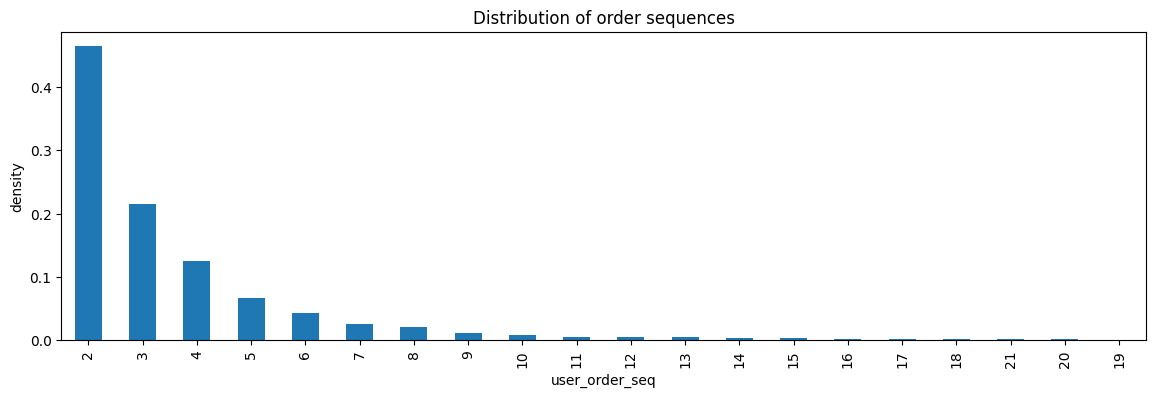

In [14]:
plot_bar_distribution(df_bought, "user_order_seq", "Distribution of order sequences")

Only second to subsequent orders of users are in this dataset.


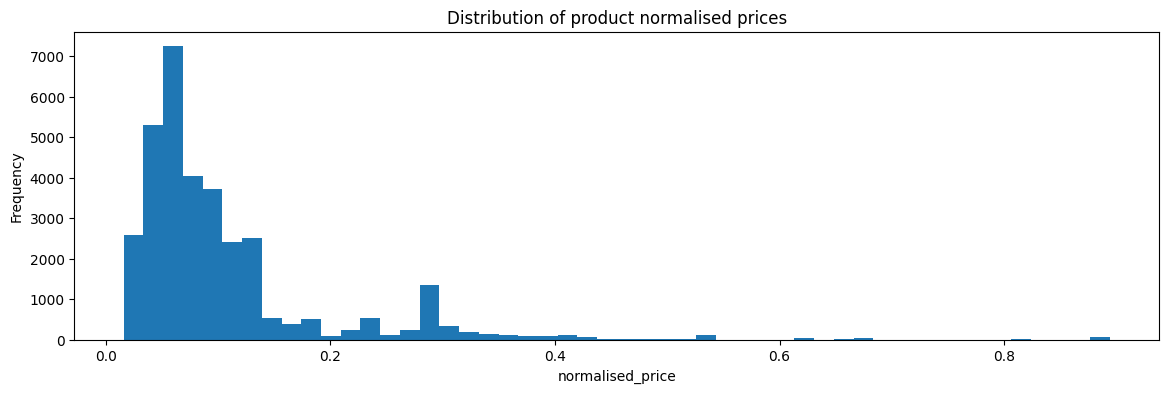

In [15]:
plot_hist_distribution(
    df_bought, "normalised_price", "Distribution of product normalised prices"
)

Most of the products sold are in the lower range price.


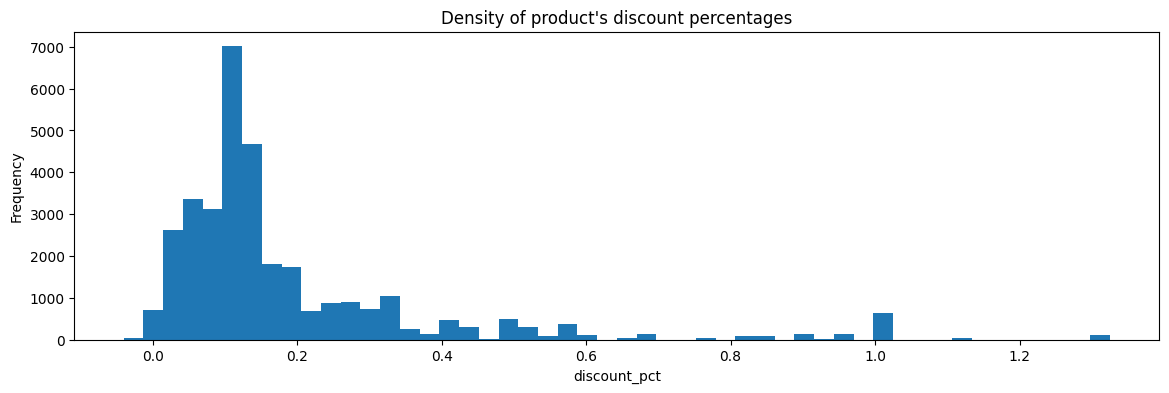

In [16]:
plot_hist_distribution(
    df_bought, "discount_pct", "Density of product's discount percentages"
)

<Axes: title={'center': "Boxplot for product's discount percentages"}>

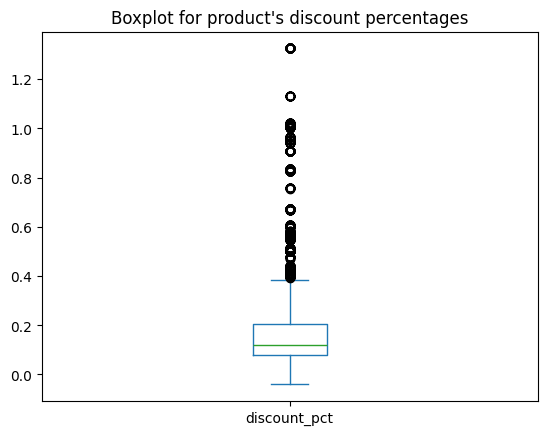

In [17]:
df_bought["discount_pct"].plot(
    kind="box", title="Boxplot for product's discount percentages"
)

In [18]:
df_bought["discount_pct"].sort_values()

1851859   -0.040161
1852288   -0.040161
1852249   -0.040161
1852240   -0.040161
1851863   -0.040161
             ...   
940512     1.325301
940535     1.325301
940547     1.325301
940377     1.325301
939089     1.325301
Name: discount_pct, Length: 33232, dtype: float64

How can products have negative discount? What about 132% discount, how is that\
possible? If discount is >=100%, are we giving it for free or as part of a pack\
promotion?


We should ask about if >100% discounts are possible. If not, remove them.


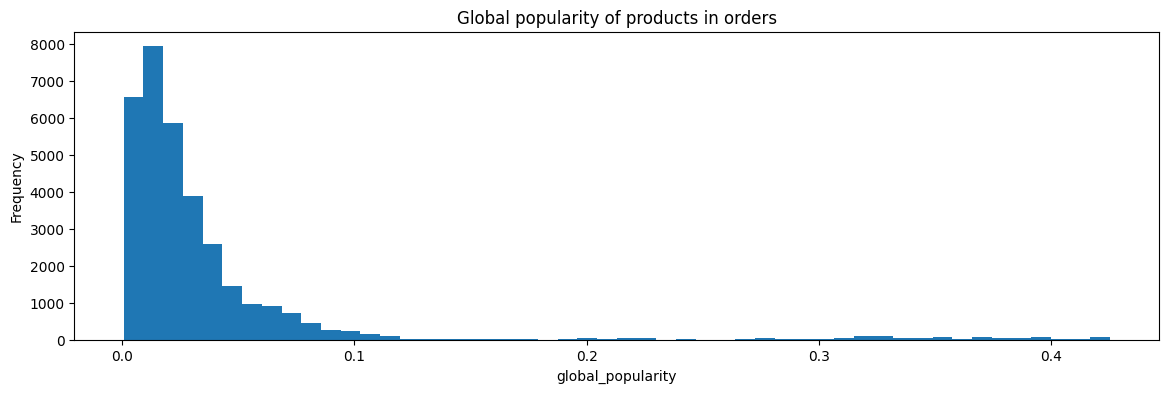

In [19]:
plot_hist_distribution(
    df_bought, "global_popularity", "Global popularity of products in orders"
)

There are a few products that are really popular. Although, it depends on the\
date also, as global_popularity fluctuates.


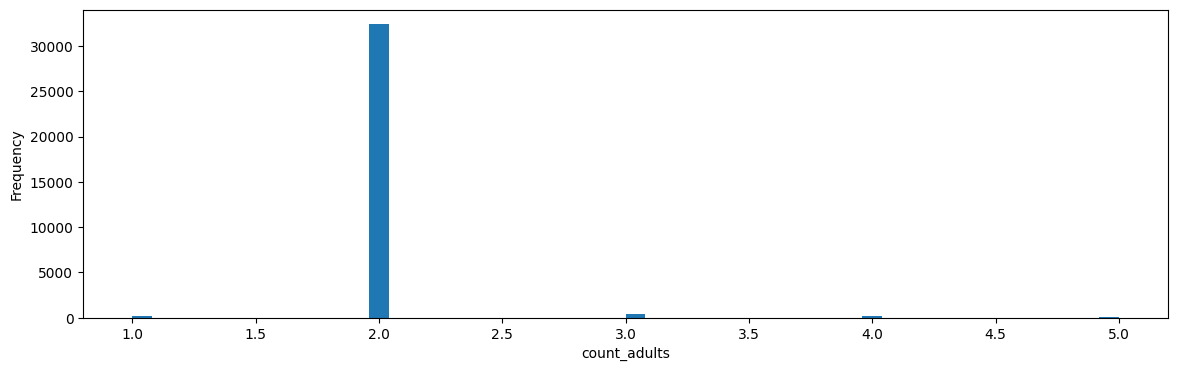

In [20]:
plot_hist_distribution(df_bought, "count_adults", "")

The `count_adults` column probably had missing values that were imputed by\
the mean.


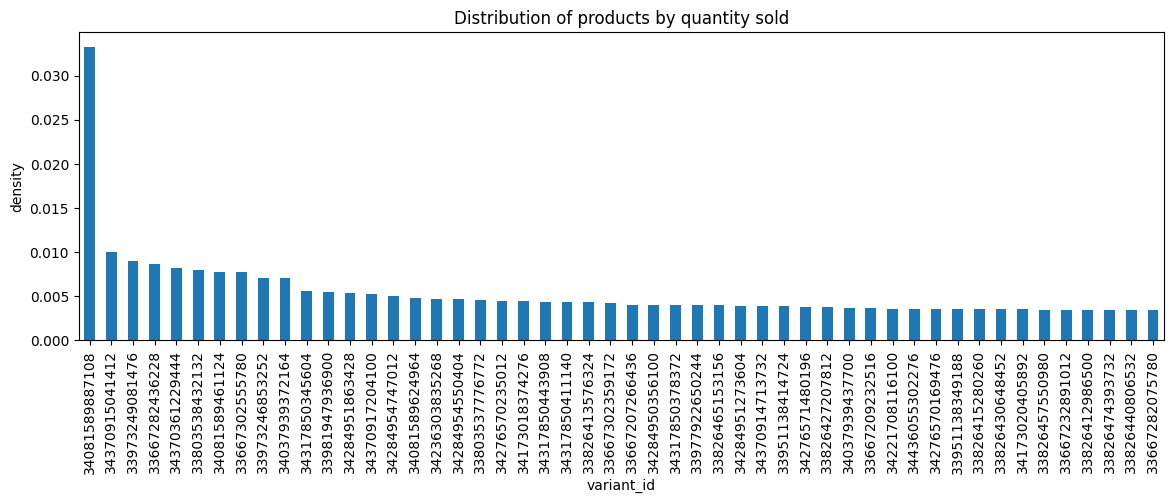

In [21]:
plot_bar_distribution(
    df_bought, "variant_id", "Distribution of products by quantity sold"
)

There is one specific product that is extremelly popular


In [22]:
df_bought.query("variant_id == 34081589887108").head(3)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
85488,34081589887108,longlifemilksubstitutes,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,1.0,0.0,1.0,0.0,0.0,0.284359,0.138227,oatly,0.153846,2.0,0.0,0.0,0.0,2.0,33.0,25.0,19.68243,30.0,25.0,21.04899
85491,34081589887108,longlifemilksubstitutes,2808548917380,3476645445764,2020-10-06 14:23:08,2020-10-06,5,1.0,1.0,0.0,0.0,0.0,0.284359,0.138227,oatly,0.153846,2.0,0.0,0.0,0.0,2.0,33.0,25.0,19.68243,30.0,25.0,21.04899
85497,34081589887108,longlifemilksubstitutes,2809061539972,3437017956484,2020-10-07 08:48:22,2020-10-07,14,1.0,1.0,0.0,0.0,0.0,0.284359,0.138227,oatly,0.144737,2.0,0.0,0.0,0.0,2.0,33.0,25.0,19.68243,30.0,25.0,21.04899


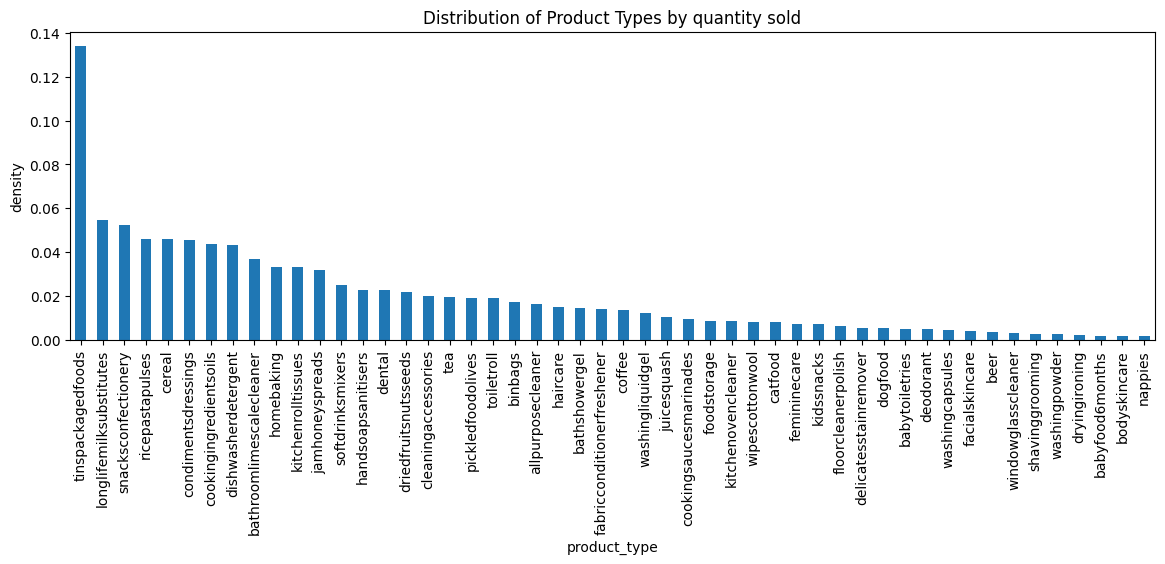

In [23]:
# Distribution of categorial variables
plot_bar_distribution(
    df_bought, "product_type", "Distribution of Product Types by quantity sold"
)

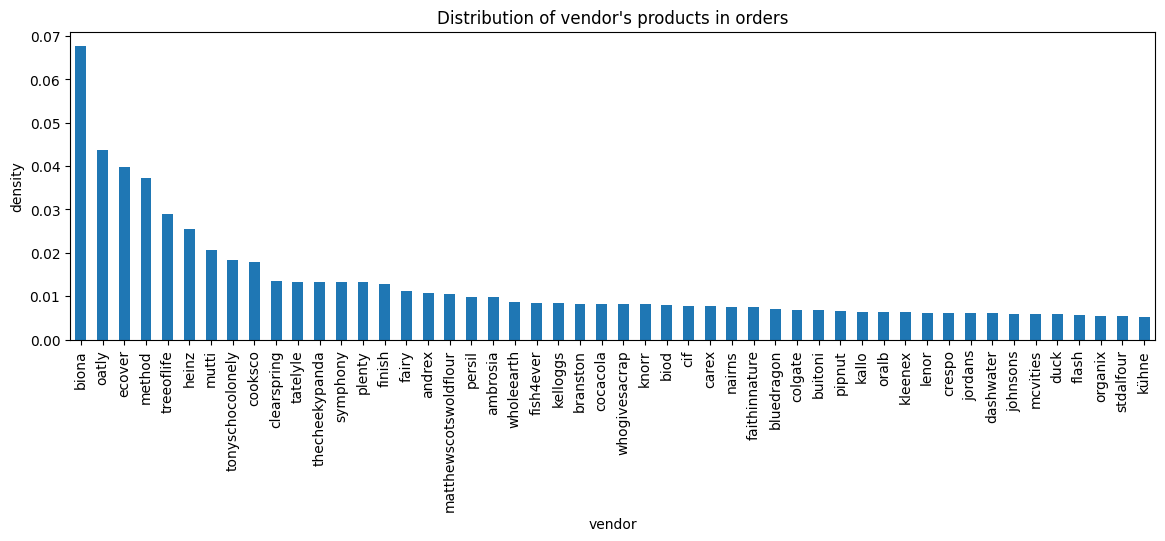

In [24]:
plot_bar_distribution(
    df_bought, "vendor", "Distribution of vendor's products in orders"
)

In [25]:
df["variant_id"].nunique()

976

In [26]:
df[df["order_id"] == 2918116982916]["outcome"].value_counts()

outcome
0.0    872
1.0     10
Name: count, dtype: int64

In each order, all product id's are included, showing us which were bought\
and which weren't.


<Axes: title={'center': 'Distribution of the num. of orders of users'}, xlabel='Num. of orders', ylabel='Frequency'>

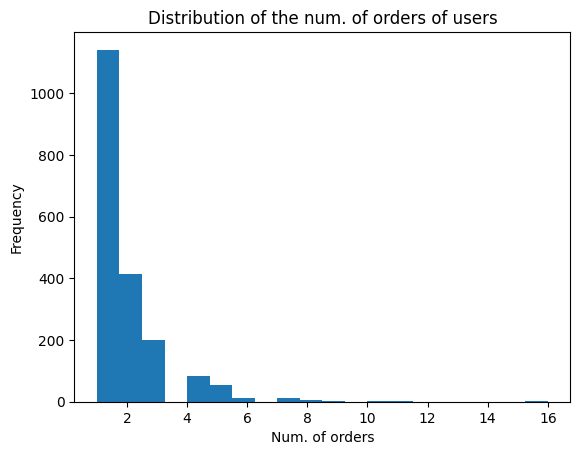

In [27]:
df_bought.groupby("user_id")["order_id"].nunique().plot(
    kind="hist",
    bins=20,
    title="Distribution of the num. of orders of users",
    xlabel="Num. of orders",
)

Our primary objective is to identify features that correlate with the product\
outcome. To achieve this, I have chosen relevant features for calculating this\
correlation.


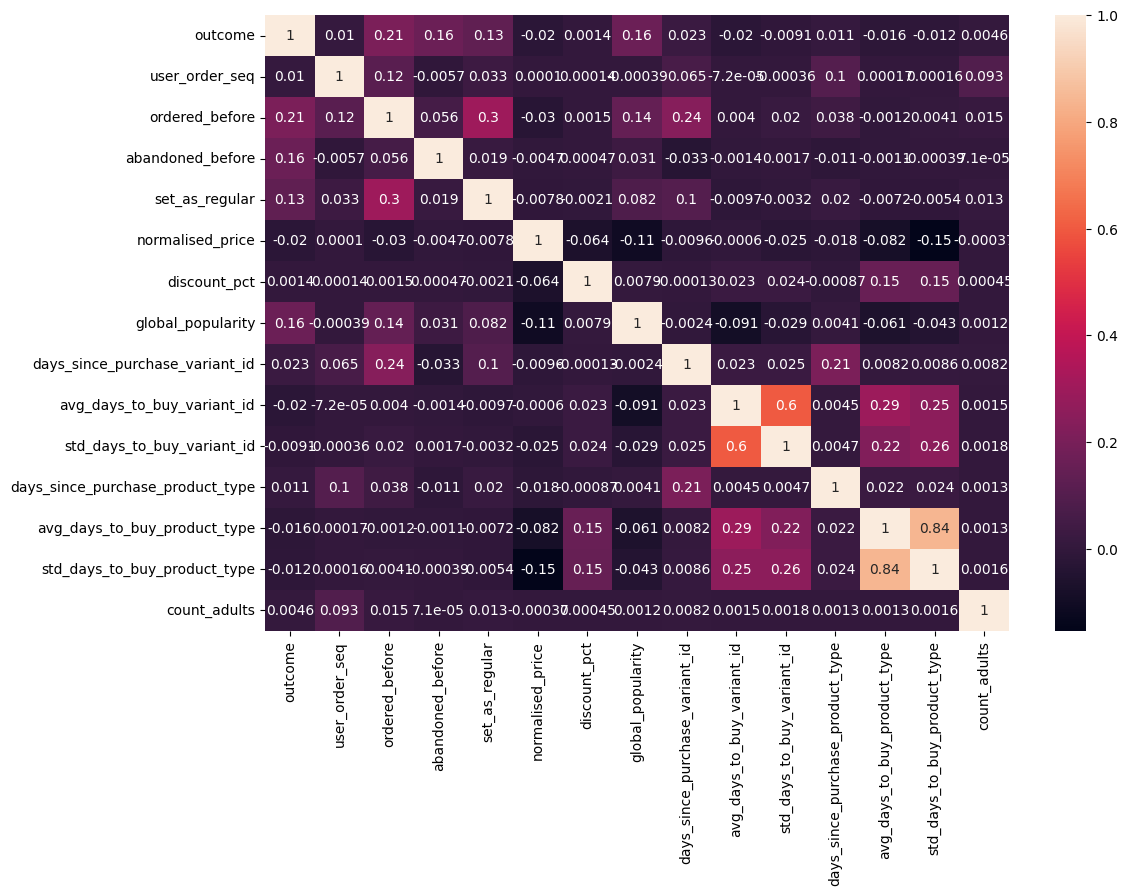

In [28]:
df_corr = df[
    [
        "outcome",
        "user_order_seq",
        "ordered_before",
        "abandoned_before",
        "set_as_regular",
        "normalised_price",
        "discount_pct",
        "global_popularity",
        "days_since_purchase_variant_id",
        "avg_days_to_buy_variant_id",
        "std_days_to_buy_variant_id",
        "days_since_purchase_product_type",
        "avg_days_to_buy_product_type",
        "std_days_to_buy_product_type",
        "count_adults",
    ]
].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

Observations:

- There is some correlation between a product's `outcome` and the\
  `ordered_before`, `abandoned_before`, `set_as_regular` and `global_popularity`\
  and a lower correlation with `user_order_seq`, `days_since_purchase_variant_id` and\
  `days_since_purchase_product_type` variables.
- Discounts on products have almost no effect on their `outcome`.
